In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pybear/cats-vs-dogs")

print("Path to dataset files:", path)

100%|██████████| 788M/788M [00:06<00:00, 129MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pybear/cats-vs-dogs/versions/1


In [2]:
import os
import shutil
from PIL import Image


In [3]:
raw_images = path + "/PetImages/"
cleaned_images = path + "/PetImages/cleaned"

os.makedirs(cleaned_images, exist_ok=True)


In [4]:
for categories in ['Cat', 'Dog']:
    os.makedirs(os.path.join(cleaned_images , categories), exist_ok= True)
    source_folder = os.path.join(raw_images , categories)
    cleaned_folder = os.path.join(cleaned_images , categories)


    for img_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, img_name)
        cleaned_path = os.path.join(cleaned_folder , img_name)
        try:
            with Image.open(source_path) as img:
                img = img.convert("RGB")
                img.save(cleaned_path)
        except Exception as e:
            print(f"corrupted file cant be open: {source_path}")



corrupted file cant be open: /root/.cache/kagglehub/datasets/pybear/cats-vs-dogs/versions/1/PetImages/Cat/666.jpg
corrupted file cant be open: /root/.cache/kagglehub/datasets/pybear/cats-vs-dogs/versions/1/PetImages/Cat/Thumbs.db
corrupted file cant be open: /root/.cache/kagglehub/datasets/pybear/cats-vs-dogs/versions/1/PetImages/Dog/11702.jpg
corrupted file cant be open: /root/.cache/kagglehub/datasets/pybear/cats-vs-dogs/versions/1/PetImages/Dog/Thumbs.db


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [5]:
import random
import matplotlib.pyplot as plt

def view_images_cat(count = 10):
    folder_cat = f"{path}/PetImages/cleaned/Cat"
    files_name = os.listdir(folder_cat)
    random_file = random.sample(files_name, count)

    for i , file in enumerate(random_file):
        path_ = os.path.join(folder_cat, file)
        plt.figure(figsize=(3, 3))
        img = Image.open(path_)
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


def view_images_dog(count=10):
    folder_Dog = f"{path}/PetImages/cleaned/Dog"
    files_name = os.listdir(folder_Dog)
    random_file = random.sample(files_name, count)

    for i , file in enumerate(random_file):
        path_ = os.path.join(folder_Dog , file)
        plt.figure(figsize=(3, 3))
        img = Image.open(path_)
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# view_images_cat()
# view_images_dog()

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import warnings
from keras.preprocessing import image_dataset_from_directory
warnings.filterwarnings("ignore")

In [23]:

train_dataset = image_dataset_from_directory(
    directory=cleaned_images,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128),
    validation_split=0.2,
    subset="training",
    seed=99
)

validation_dataset = image_dataset_from_directory(
    directory=cleaned_images,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128),
    validation_split=0.2,
    subset="validation",
    seed=99
)

Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


In [25]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [26]:
model = Sequential()

data_augmentation,
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "best_cat_dog_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    callbacks=[checkpoint]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5940 - loss: 0.6557
Epoch 1: val_accuracy improved from -inf to 0.73475, saving model to best_cat_dog_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.5941 - loss: 0.6556 - val_accuracy: 0.7347 - val_loss: 0.5260
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7634 - loss: 0.4906
Epoch 2: val_accuracy improved from 0.73475 to 0.79696, saving model to best_cat_dog_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7634 - loss: 0.4906 - val_accuracy: 0.7970 - val_loss: 0.4568
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8146 - loss: 0.4103
Epoch 3: val_accuracy improved from 0.79696 to 0.81796, saving model to best_cat_dog_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8147 - loss: 0.4102 - val_accuracy: 0.8180 - val_loss: 0.4096
Epoch 4/10
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8511 - loss: 0.3440
Epoch 4

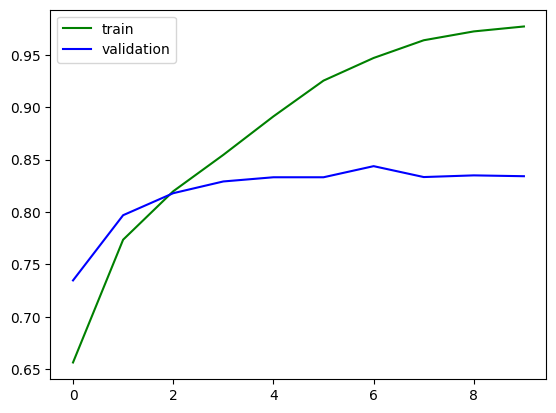

In [30]:
plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

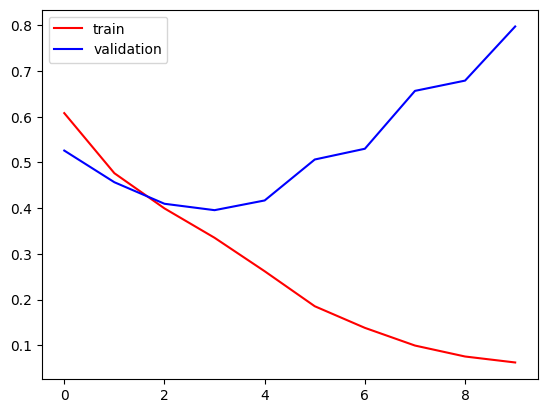

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()